In [51]:
import pickle as pkl
import pandas as pd
import os
import numpy as np
from collections import Counter

In [52]:
metadata = pd.read_csv('metadata.csv')
metadata = metadata[metadata['language'] == "['en']"]
metadata = metadata[metadata['type'] == "Text"]
metadata = metadata[metadata['subjects'] != 'set()']

In [53]:
def count_unique(x):
    return len(pd.unique(x))

In [54]:
subject_col = metadata.subjects
subject_set = Counter()
subject_data = []
for sc in subject_col:
    subject_list = sc.replace('}',"").replace("'", "").replace("{", "").split(',')
    for s in subject_list:
        if " -- " in s:
            subject_list.remove(s)
            subject_list = subject_list + [_s.strip() for _s in s.split("--")]
    subject_data.append(subject_list)
    subject_set.update(subject_list)

clean_subjects = [[x.strip() for x in subject] for subject in subject_data]

clean_subject_data = []
clean_subject_set = Counter()
for clean_subject_list in clean_subjects:
        
        clean_subject_data.append(list(set(clean_subject_list)))
        clean_subject_set.update(clean_subject_list)

In [55]:
subject_col = metadata.subjects
subject_set = Counter()
subject_data = []
for sc in subject_col:
    subject_list = sc.replace('}',"").replace("'", "").replace("{", "").split(',')
    for s in subject_list:
        if " -- " in s:
            subject_list.remove(s)
            subject_list = subject_list + [_s.strip() for _s in s.split(" -- ")]
    subject_data.append(subject_list)
    subject_set.update(subject_list)

clean_subjects = [[x.strip() for x in subject] for subject in subject_data]

clean_subject_data = []
clean_subject_set = Counter()
for clean_subject_list in clean_subjects:
        for cs in clean_subject_list:
            if " -- " in cs:
                clean_subject_list.remove(cs)
                clean_subject_list = clean_subject_list + [_cs.strip() for _cs in cs.split(" -- ")]
            
        clean_subject_data.append(list(set(clean_subject_list)))
        clean_subject_set.update(clean_subject_list)

In [56]:
sum([' -- ' in subj for subj in clean_subject_set])



0

In [57]:
most_common = clean_subject_set.most_common()

# Over representation of "Fiction"
for i in range(10):
    most_common.pop(0)

most_common

[('Description and travel', 2145),
 ('Short stories', 2115),
 ('Science fiction', 1622),
 ('Conduct of life', 1563),
 ('Translations into English', 1500),
 ('Drama', 1424),
 ('World War', 1305),
 ('English', 1266),
 ('1914-1918', 1241),
 ('Poetry', 1101),
 ('France', 1057),
 ('American', 924),
 ('Adventure stories', 813),
 ('Juvenile literature', 799),
 ('Early works to 1800', 773),
 ('Civil War', 741),
 ('1861-1865', 737),
 ('English wit and humor', 691),
 ('etc.', 644),
 ('Politics and government', 640),
 ('Love stories', 638),
 ('Detective and mystery stories', 622),
 ('History and criticism', 547),
 ('20th century', 545),
 ('Historical fiction', 543),
 ('Sources', 518),
 ('Canada', 502),
 ('Scotland', 500),
 ('Ireland', 497),
 ('Young women', 495),
 ('Women', 490),
 ('Man-woman relationships', 489),
 ('Children', 482),
 ('Indians of North America', 472),
 ('Personal narratives', 468),
 ('English poetry', 454),
 ('India', 451),
 ('Western stories', 434),
 ('Christian life', 430),
 (

In [58]:

subject_frequency = {mc[0]:mc[1] for mc in most_common}
ordered_subjects = [sorted(list(set(cs)), key = lambda x: subject_frequency.get(x,0), reverse=True) for cs in clean_subject_data]
ordered_subjects

[['Sources',
  'Revolution',
  '1775-1783',
  'United States. Declaration of Independence',
  'History',
  'United States'],
 ['Sources',
  'Civil rights',
  'United States. Constitution. 1st-10th Amendments',
  'United States'],
 ['Presidents',
  'Foreign relations',
  'Inaugural addresses',
  '1961-1963',
  'United States'],
 ['Abraham',
  'Lincoln',
  'Pennsylvania',
  'Gettysburg',
  '1809-1865. Gettysburg address',
  'Consecration of cemeteries',
  'Pa.)"',
  '"Soldiers National Cemetery (Gettysburg'],
 ['Politics and government',
  'Sources',
  '1783-1789',
  'United States. Constitution',
  'United States'],
 ['American',
  'etc.',
  'Politics and government',
  'Sources',
  '1775-1783',
  'Virginia',
  'addresses',
  'Speeches',
  'United States'],
 ['Sources',
  'Massachusetts',
  'Pilgrims (New Plymouth Colony)',
  'New Plymouth',
  '1620-1691',
  'Mayflower Compact (1620)',
  'History'],
 ['1861-1865',
  'Politics and government',
  'Presidents',
  'Inaugural addresses',
  '

In [59]:
metadata['subject_set'] = [os for os in ordered_subjects]
metadata['Sub_A'] = [os[0] for os in ordered_subjects]
metadata['Sub_B'] = [os[1] if len(os) > 1 else pd.NA for os in ordered_subjects]
metadata['Sub_C'] = [os[2] if len(os) > 2 else pd.NA for os in ordered_subjects]

<Axes: xlabel='Sub_C'>

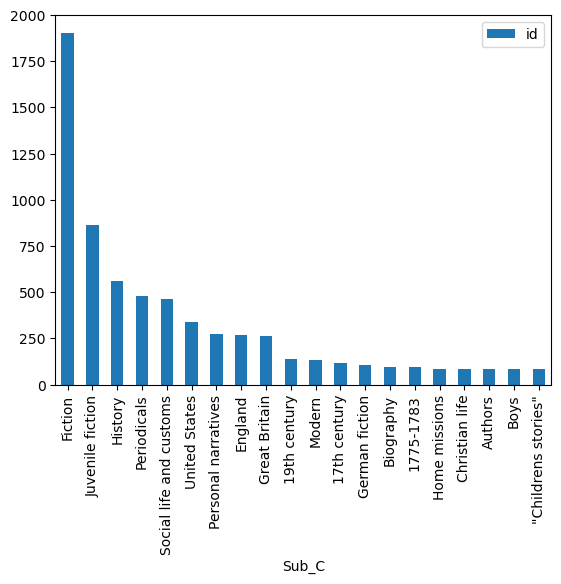

In [60]:
metadata.groupby('Sub_C').agg({'id':'count'}).sort_values(by = 'id', ascending=False).head(20).plot(kind='bar')

In [61]:
metadata.groupby('Sub_A').agg({'id':'count'}).sort_values(by = 'id', ascending=False).to_csv('SubA.csv')
metadata.groupby('Sub_B').agg({'id':'count'}).sort_values(by = 'id', ascending=False).to_csv('SubB.csv')
metadata.groupby('Sub_C').agg({'id':'count'}).sort_values(by = 'id', ascending=False).to_csv('SubC.csv')

In [62]:
ordered_subjects

[['Sources',
  'Revolution',
  '1775-1783',
  'United States. Declaration of Independence',
  'History',
  'United States'],
 ['Sources',
  'Civil rights',
  'United States. Constitution. 1st-10th Amendments',
  'United States'],
 ['Presidents',
  'Foreign relations',
  'Inaugural addresses',
  '1961-1963',
  'United States'],
 ['Abraham',
  'Lincoln',
  'Pennsylvania',
  'Gettysburg',
  '1809-1865. Gettysburg address',
  'Consecration of cemeteries',
  'Pa.)"',
  '"Soldiers National Cemetery (Gettysburg'],
 ['Politics and government',
  'Sources',
  '1783-1789',
  'United States. Constitution',
  'United States'],
 ['American',
  'etc.',
  'Politics and government',
  'Sources',
  '1775-1783',
  'Virginia',
  'addresses',
  'Speeches',
  'United States'],
 ['Sources',
  'Massachusetts',
  'Pilgrims (New Plymouth Colony)',
  'New Plymouth',
  '1620-1691',
  'Mayflower Compact (1620)',
  'History'],
 ['1861-1865',
  'Politics and government',
  'Presidents',
  'Inaugural addresses',
  '

In [63]:
A_subjects = Counter(); B_subjects = Counter(); C_subjects = Counter()
A_subjects.update(metadata['Sub_A'])
B_subjects.update(metadata['Sub_B'])
C_subjects.update(metadata['Sub_C'])

In [64]:
A_subjects.most_common(20)
del A_subjects['etc.']
del A_subjects['...']
del A_subjects['19th century']
B_subjects.most_common(20)
del B_subjects['etc.']
del B_subjects['...']
del B_subjects['19th century']
C_subjects.most_common(20)

[(<NA>, 15634),
 ('Fiction', 1905),
 ('Juvenile fiction', 862),
 ('History', 562),
 ('Periodicals', 478),
 ('Social life and customs', 465),
 ('United States', 338),
 ('Personal narratives', 273),
 ('England', 267),
 ('Great Britain', 261),
 ('19th century', 139),
 ('Modern', 134),
 ('17th century', 115),
 ('German fiction', 106),
 ('1775-1783', 93),
 ('Biography', 93),
 ('Christian life', 87),
 ('Home missions', 87),
 ('Authors', 86),
 ('"Childrens stories"', 84)]

In [65]:
top_subjects = set()
top_subjects.update([subj[0] for subj in A_subjects.most_common(20)])
top_subjects.update([subj[0] for subj in B_subjects.most_common(20)])
top_subjects.update([subj[0] for subj in C_subjects.most_common(20)])
len(top_subjects)

45

In [66]:
top_subjects

{'"Childrens stories"',
 '1775-1783',
 '17th century',
 '1861-1865',
 '1914-1918',
 '19th century',
 '20th century',
 <NA>,
 'Adventure stories',
 'American',
 'Authors',
 'Biography',
 'Children',
 'Christian life',
 'Civil War',
 'Conduct of life',
 'Description and travel',
 'Detective and mystery stories',
 'Drama',
 'England',
 'English',
 'English wit and humor',
 'Fiction',
 'France',
 'German fiction',
 'Great Britain',
 'Historical fiction',
 'History',
 'Home missions',
 'Humorous stories',
 'Juvenile fiction',
 'Juvenile literature',
 'Love stories',
 'Modern',
 'Periodicals',
 'Personal narratives',
 'Poetry',
 'Politics and government',
 'Science fiction',
 'Short stories',
 'Social life and customs',
 'Translations into English',
 'United States',
 'World War',
 'Young women'}

In [67]:
works = metadata[metadata.Sub_A.apply(lambda S: S in top_subjects)]
len(works)

17676

In [68]:
# Works with Authors
works_wa = works[works.author.isna() == False]
works_wa = works_wa[works_wa.authoryearofbirth.isna() == False]
works_wa = works_wa[works_wa.authoryearofdeath.isna() == False]
author_counts = works_wa.groupby('author').agg({'id':count_unique})
authors = author_counts[author_counts.id >= 5]

works_wa = works_wa[works_wa.author.apply(lambda A: A in authors.index)]
works_wa.Sub_A.unique()

array(['1861-1865', 'English', 'Adventure stories', 'Poetry',
       'Historical fiction', 'Love stories', 'Translations into English',
       'Science fiction', 'Young women', '20th century',
       'Conduct of life', 'France', 'Civil War', 'Humorous stories',
       'Short stories', 'Detective and mystery stories', 'American',
       'Children', 'Description and travel', 'World War', 'Authors',
       'Fiction', '"Childrens stories"', 'Juvenile literature', 'Drama',
       'Politics and government', 'English wit and humor', '19th century',
       'History', 'United States', 'Social life and customs',
       'Great Britain', 'England', 'Personal narratives',
       'Christian life', '17th century', 'Biography', 'Modern'],
      dtype=object)

In [69]:
# works_wa.groupby('Sub_A', group_keys=False).apply(lambda x: x.sample(frac=0.6))

works_wa.to_csv('seed_worksF.csv')

In [70]:
works_wa.shape

(8025, 13)